# **Digit Recognition using Keras**

We know that CNNs can be used to classify images. In this tutorial, we will see how to build a CNN model using Keras to recognize digits.

We will use **MNIST dataset** for classifying images of handwritten digits. Each image is of 28x28 pixels.
It is a large dataset of *70000* images with *60000* as training images with labels and *10000* as testing images with labels. The labels are the numbers that are present in the images, *i.e.,* for an image with handwritten digit '3', its label is '3'.

We will use the following steps for building the convolutional neural network.

1. *Import all the necessary libraries*
2. *Load the dataset*
3. *Perform Exploratory Data Analysis*
4. *Preprocessing of Data*
5. *Building the Model Pipeline*
6. *Train the model*
7. *Evaluate and Predict.*


## **1. Libraries**

We will be using the following libraries for buildng the CNN model.
1. Tensorflow
2. Keras
3. Matplotlib.pyplot


##### **Tensorflow**

Tensorflow is a very powerful library developed by Google, is open-sourced and is widely used for handling multi-dimensional data. It is preferred by programmers for Deep Learning models.


##### **Keras**

Keras has inbuilt methods for various types of APIs and layers for building Neural Networks. Keras is included within Tensorflow version 2.0 or more therefore there's no need to import keras again, once tensorflow is imported.

##### **Sequential API**

Keras comes built in with 3 methods for building the neural networks - Sequential, Functional and Model-Subclassing. 

The sequential API allows us to create models layer-by-layer for most problems as the basic neural network theory suggests. *Sequential API groups a linear stack of layers into a tf.keras.model or keras.model*

We'll be using Sequential API in this tutorial since we need to have the model layer by layer.

[*Refer this article on types of layers*](https://www.tutorialspoint.com/keras/keras_models.htm)

[*Refer this article on implementing Functional API in detail*](https://machinelearningmastery.com/keras-functional-api-deep-learning/)

##### **Keras Layers**

We'll be using various layers in our project

*Dense*: Dense layers are the regular hidden layers used in Artificial Neural Networks. These can also be interpreted as fully connected layers in CNN projects.

*Conv2D, MaxPoolind2D, Flatten*: These are the Convolutional layers we'll be using in this project. Flatten module will help convert 2D data into 1D so that it can be fed to fully connected layers.




##### **Matplotlib.pyplot**

This library is used to plot graphs in python, and since images also are 2 dimensional in nature, can also be displayed. 

##### Let us import all the necessary libraries 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

#%matplotlib inline # Un-comment this if using in iPython, i.e jupyter etc.

import random     #Random is a very handy library to randomize any number/data. 
                  #We'll use this to randomly select an image to see the variety of images.


# Importing the Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

## **2. Loading the Dataset**





In this step we will load the MNIST dataset. MNIST Dataset is present in **tf.keras.datasets** module and can be called by using load_data() method.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

The load_data() method returns 2 *tuples*, one for training and one for testing. 

The two tuples correspond to Training and Testing Datasets.

Each tuple has 2 entities- The Data/Image(X) and the associated label(Y). 

Each entity is a *numpy.ndarray* object (Numpy N-Dimensional Array).


## **3. Exploratory Data Analysis**

Let us explore the MNIST dataset before building the model. We will first take a look at the images of digits in the dataset

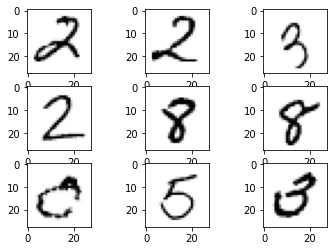

In [ ]:
for i in range(1,10):
  plt.subplot(3,3,i)
  plt.imshow(x_train[random.randint(0,60000)],cmap="Greys")

# We're using Matplotlib library to plot 
# various images taken randomly

Next, we will take a look at more details about each image. We already know that, the data is stored in numpy arrays which are multi-dimensional. x_train for example is an array which has 60000 elements in it. 

Each element is an image. Each element further contains elements for 28 rows and each row has 28 elements of pixel values ranging from 0 to 255.

Let's see the contents of the first image in x_train.

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Now let us take a look at the label for the first image in Y-Train

In [ ]:
y_train[0]

5

We'll now try to display the actual image using the matplotlib.pyplot library.

Index is 26343 and The Image label is:  0 




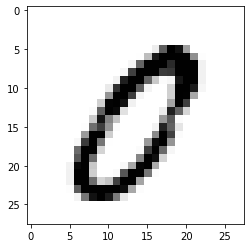

In [ ]:
# Select any image index up to 60,000
image_index = random.randint(0,60000) # Or remove the "randint" method and manually enter a number

print("Index is",image_index,"and The Image label is: ",y_train[image_index],"\n\n") 
plt.imshow(x_train[image_index], cmap='Greys')


Randint generates a random integer between the two arguments provided to it.

The imshow method will display the image in a graph by taking the input image matrix provided to it

## **4. Pre-Processing the Data**



Preprocessing is an important step before buiding the model. The Pre-Processing step ensures that proper data with correct format is fed into the model.

*Keep in mind that dimension coversion is also an important step in the process. It is because, some models/layers/methods will take the inputs only in certain dimensions and the output also must be taken properly as needed by the model.*

###### Let us see the dimensions of x_train

In [ ]:
# Initial shape before preprocessing
x_train.shape

(60000, 28, 28)

We see that its a 3-D data element- 60000 images and each image with 28x28 pixels.

Keras API takes only 4-D inputs, the 4th dimension being the number of channels in the data. In our data, it has only one channel(Grey)

So, let's convert the data into 4-D vectors/tensors

Let us observe a random pixel row (say 14th) of the image after each pre processing step, to undertand how the data is being modified.

In [ ]:
x_train[0][14]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [ ]:
# Now let's observe the modified shape of x_train
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_train[0][14]

array([[  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [ 81],
       [240],
       [253],
       [253],
       [119],
       [ 25],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0]], dtype=uint8)

Now, some of the functionalities like activation functions work only with numbers ranging from 0 to 1,thus we need to convert the pixel values in this range.
>The pixel values range from 0 to 255

>To convert to 0 to 1, 

>we need to divide the numbers by 255

In [ ]:
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [ ]:
x_train[0][14]

array([[  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [ 81.],
       [240.],
       [253.],
       [253.],
       [119.],
       [ 25.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.]], dtype=float32)

In [ ]:
# Normalizing by dividing with 255
x_train /= 255
x_test /= 255

In [ ]:
x_train[0][14]


array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.31764707],
       [0.9411765 ],
       [0.99215686],
       [0.99215686],
       [0.46666667],
       [0.09803922],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

## **5. Building the Model**

Now comes the most important step in the process - building the network.

We will use sequential model for this project. You're free to explore other types of models on web.

We'll add a combination of the layers specified above. Let us see the structure of our model.

*Sequential Model*

**Input ->  Conv2D layer (28 filters) -> MaxPooling layer (then flattened) -> Dense layer (128 neurons) -> Dense layer(10 neurons) -> Output**

The number of filters and the number of neurons in the dense layer are taken by trial for a good accuracy and need not be fixed. You can try varying the filters/neurons and check the varied accuracy.

In [ ]:
input_shape = (28, 28, 1)

# Creating a Sequential Model and adding the layers
model = Sequential()
#model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
#model.add(Dense(128, activation="relu"))
#model.add(Dense(10,activation="softmax"))



### **Description for layers**

####Conv2D layer

```
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
```

In Conv2D layer, we take a kernel size of 3x3 matrix. Always remember to add the input_shape parameter in the first layer of the network- which is the shape of each sample(image).


In [ ]:
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))

####MaxPooling2D

```
model.add(MaxPooling2D(pool_size=(2, 2)))
```


The pool size of Maxpooling is taken as 2x2.



In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

####Flatten the layer

```
model.add(Flatten())
```



It is then flattened into 1D by using a Flatten() after Maxpooling.


In [ ]:
model.add(Flatten())

####Dense layer

```
model.add(Dense(128, activation="relu"))
```
Then, dense layers of 128 Neurons are added with relu activation.


In [ ]:
model.add(Dense(128, activation="relu"))

####Output layer
```
model.add(Dense(10,activation="softmax"))
```

Finally an output layer with 10 Neurons are added with softmax activation. The final layer has 10 nodes/neurons since we have 10 classes for each digit

In [ ]:
model.add(Dense(10,activation="softmax"))

### **Activation Functions used in CNNs**



Usually , **ReLU** activation function is used in the CNNs as they act as hidden layers in the network.
*  The final layer in the *fully connected layers* uses the ***Softmax Activation function*** (instead of ReLU) which is used to get probabilities of the input belonging to a particular class. (classification).



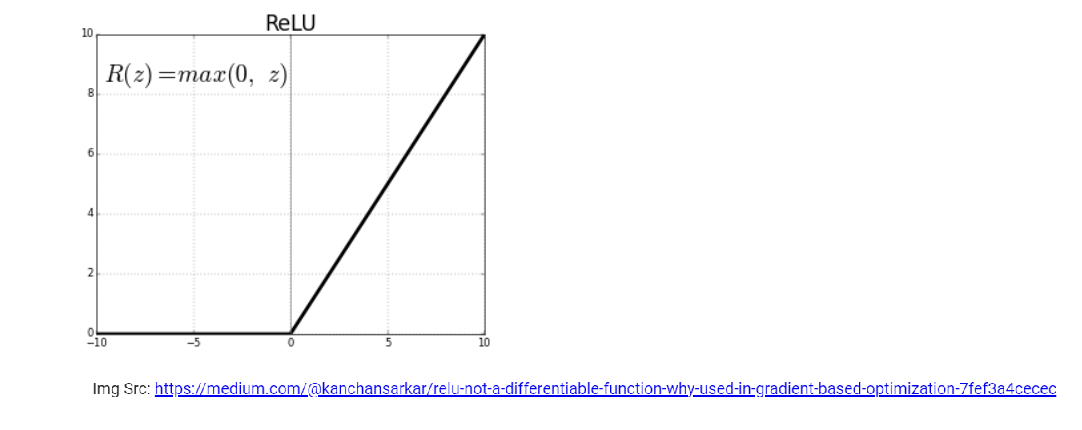

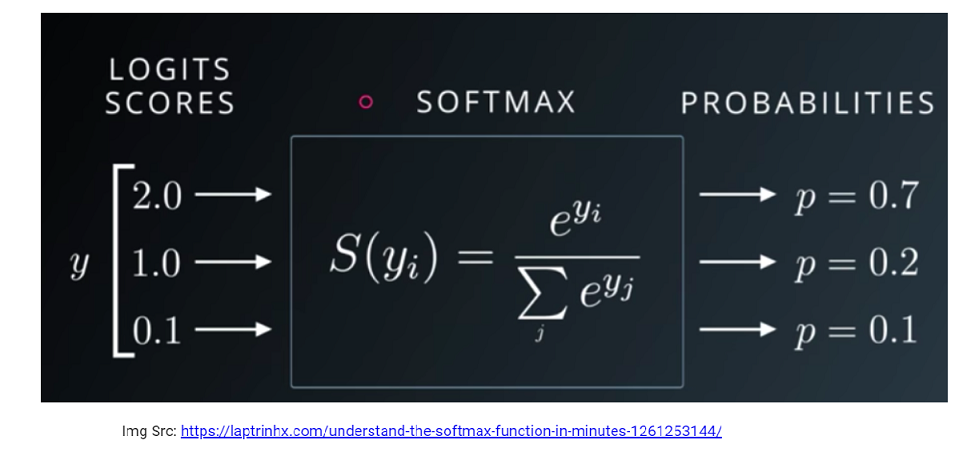

## **6.Compiling and Training the Model**

The physical model is built, now we have to compile the model. The model.compile() method handles this.

The model.compile() method has three arguments- 

1. optimizer: The algorithm to be used (such as SGD for Stochastic Gradient Descent)

2. Loss: The Loss function

3. Metrics: The metrics that need to be displayed while the model is training.

We have considered adam optimizer, sparse_categorical_crossentropy loss and accuracy metrics.

Refer the following links to know more about loss functions used in CNNs:
1. Multi-class Classification: Typically **[Cross Entropy Loss](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)**

1. Regression: Typically **[Squared Error loss](https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/)**

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Now the training begins! model.fit() method handles training. Now the input data - x_train and y_train are fed into the model. 

We train the model for 10 epochs. 
Training the model takes more time as compared to other code blocks. 

In [ ]:
model.fit(x=x_train,y=y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3380 - accuracy: 0.8985
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0665 - accuracy: 0.9801
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0387 - accuracy: 0.9881
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0231 - accuracy: 0.9924
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0165 - accuracy: 0.9949


## **7. Evaluating the Model**

After training the model, we need to evaluate the model on unseen data - that is the test data. 

model.evaluate() method will handle the evaluation when it is fed with test data or x_test and y_test.

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0669 - accuracy: 0.9821


[0.06689153611660004, 0.9821000099182129]

### **Predicting**

Next is the most interesting part of the process, that is predicting the output of an unseen image.

The model.predict() method will take a single sample/image as input and produces the prediction as the output.

The prediction will be in the form of an array of 10 elements (since we have 10 outputs). 




Let us predict the class of the image. 

We need to input an image to the model using model.predict() method. 
The method will return the output from the model, which will be an array of 10 elements. 

Each element in the array will be a probability (ranging from 0 to 1) of the input image belonging to that particular element. 

For example, if the input image belongs to class '2', then the array will probably look like [0,0,1,0,0,0,0,0,0,0]. Observe how the array with index '2' is showing high probability (1). 

Therefore the index of the element having highest probability will be output. To get the index of highest number in a numpy array, we use argmax() method, which will return the index with highest number.

Let us see an example.

In [ ]:
import numpy as np

array=np.array([1,2,3,4,5])
array.argmax()

4

Now let's predict an image from the test dataset. 

The Actual class is:  5 

The Predicted Array is:  [[3.6116434e-16 1.4468891e-08 1.3280918e-16 1.6524838e-05 8.8370244e-15
  9.9999985e+01 2.0587379e-10 4.2211064e-14 1.2581303e-07 1.6576371e-07]] 

The Predicted class is:  5 




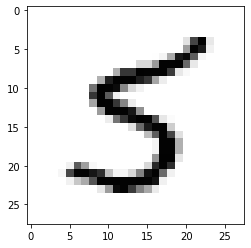

In [ ]:
image_index = random.randint(0,10000) # Or enter an index manually
#image_index = 1337
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
print("The Actual class is: ",y_test[image_index],'\n')

pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1)) # Reshaping is required since the model only takes 4D input.
print("The Predicted Array is: ",pred*100,'\n')

print("The Predicted class is: ",pred.argmax(),"\n\n")

Note: It is suggested that you run the above cell multiple times to check the correctness for various images and you might also come accross a wrong prediction.

One interesting thing to notice is to observe the *probabilities* of similar looking numbers. For example the probabilities of 6 and 0 for the same image. They might be similar because they appear alike. Similarly 5 and 6, 4 and 9 *etc.*